<a href="https://colab.research.google.com/github/AgboolaMubarak/Car-Price-Prediction/blob/main/Car_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import neccesary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read data
data = pd.read_csv("New_Data.csv")

In [3]:
#check first 5 rows of the dataset
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
#check information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


# **Data Cleaning**

In [5]:
#a function to remove commas
def remove_commas(val):
    # Remove commas
    clean_val = val.replace(",", "")
    return clean_val

In [6]:
#making sure all the values are in string so the function can work properly
data["Distance"] = data["Distance"].astype(str)
data["Year"] = data["Year"].astype(str)

In [7]:
#applying the function to the columns that has the ","
data["Distance"] = data["Distance"].apply(remove_commas)
data["Year"] = data["Year"].apply(remove_commas)

In [8]:
#check if function has worked on the columns
data["Distance"].head()

0       nan
1    125000
2    110852
3     30000
4    125206
Name: Distance, dtype: object

### Fill Missing Data

In [9]:
#check the unique values in Colour
data["Colour"].value_counts()

Black       2128
Gray        1152
Silver      1123
White       1019
Blue         554
Red          478
Gold         357
Green        179
Brown        114
Burgandy      27
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Violet         1
G              1
Teal           1
Mica           1
Pearl          1
Name: Colour, dtype: int64

In [10]:
# Group by 'color' and calculate the mode for 'year' in each group
mode_per_color = data.groupby('Colour')['Year'].apply(lambda x: stats.mode(x).mode[0]).reset_index()

<ipython-input-10-bce3c57aeb66>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_per_color = data.groupby('Colour')['Year'].apply(lambda x: stats.mode(x).mode[0]).reset_index()
<ipython-input-10-bce3c57aeb66>:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_per_color = data.groupby('Colour')['Year'].apply(lambda x: stats.mode(x).mode[0]).reset_index()


In [11]:
# Merge the mode values back into the original DataFrame to fill missing data
data = data.merge(mode_per_color, on='Colour', suffixes=('', '_mode'))
data['Year'].fillna(data['Year_mode'], inplace=True)
data.drop(columns=['Year_mode'], inplace=True)

In [12]:
#check if missing values in year has been filled
data['Year'].isna().sum()

0

In [13]:
#convert distance column to float values
data["Distance"] = data["Distance"].astype(float)

In [14]:
# Calculate the mean of the non-missing values and round it
mean_distance = data['Distance'].mean()
rounded_mean_distance = round(mean_distance)
print(rounded_mean_distance)
#fill the missing data in distance column with the mean
data['Distance'].fillna(rounded_mean_distance, inplace=True)

103199


In [15]:
#check if missing values in distance has been filled
data['Distance'].isna().sum()

0

In [16]:
# Replace 'nan' with '2017' in the 'Year' column
data['Year'] = data['Year'].replace('nan', '2017')

In [17]:
# Calculate the mode of the 'Type' column
mode_type = data['Type'].mode()[0]

#print the mode in Type
print(mode_type)

# Fill missing values in 'Type' with the mode
data['Type'].fillna(mode_type, inplace=True)

Foreign Used


In [18]:
#check if missing values in distance has been filled
data['Type'].isna().sum()

0

In [19]:
# Drop rows with missing values in the 'Amount' column
data.dropna(subset=['Amount (Million Naira)'], inplace=True)

In [20]:
#check if all missing data has been filled
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7188 non-null   object 
 8   Distance                7188 non-null   float64
dtypes: float64(2), object(7)
memory usage: 561.6+ KB


Exploratory Data Analysis

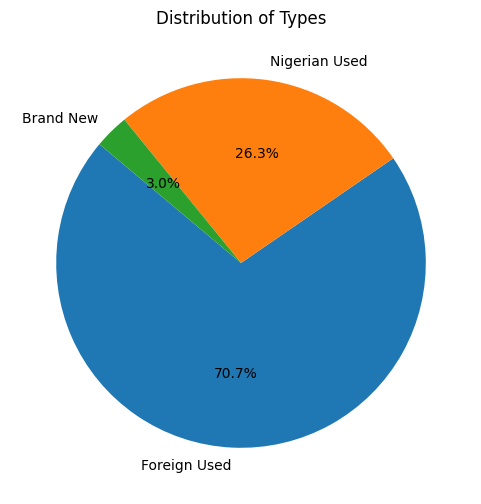

In [21]:
# Calculate the value counts and percentages for each type
type_counts = data['Type'].value_counts()
percentages = (type_counts / type_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.show()

Observation:  Foreign used cars is the most popular in the dataset

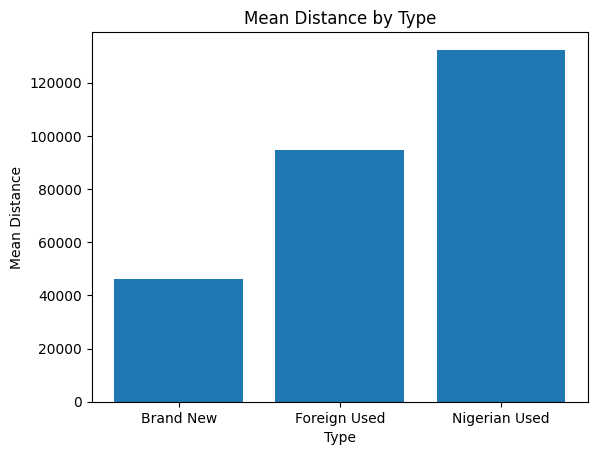

In [22]:
# Calculate the mean distance for each type
mean_distance_by_type = data.groupby('Type')['Distance'].mean()

# Create a bar chart
plt.bar(mean_distance_by_type.index, mean_distance_by_type)
plt.xlabel('Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Type')
plt.show()

Observation: Nigerian used car travel more distances than the others

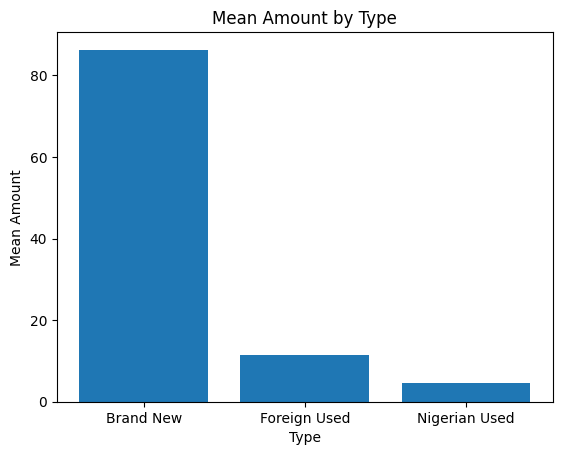

In [23]:
# Calculate the mean amount for each type
mean_amount_by_type = data.groupby('Type')['Amount (Million Naira)'].mean()

# Create a bar chart for Type against Amount
plt.bar(mean_amount_by_type.index, mean_amount_by_type)
plt.xlabel('Type')
plt.ylabel('Mean Amount')
plt.title('Mean Amount by Type')
plt.show()

Observation: Of course Brand new cars are much more expensive than the others

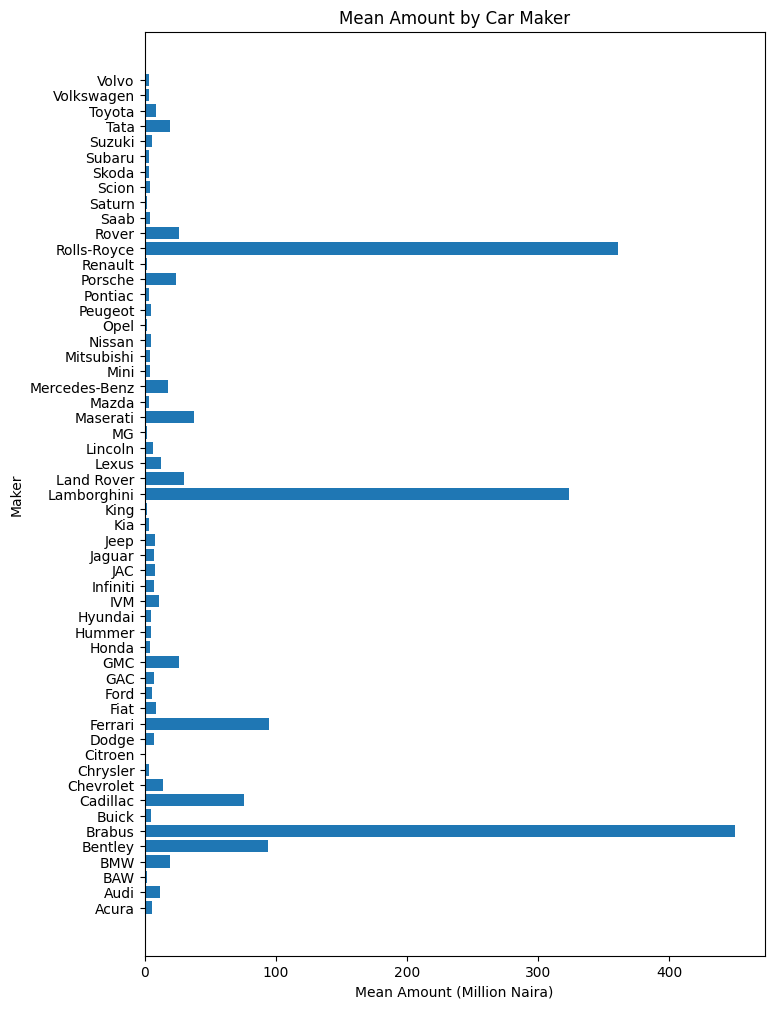

In [24]:
# Calculate the mean amount for each car maker
mean_amount_by_maker = data.groupby('Maker')['Amount (Million Naira)'].mean()

# Create a horizontal bar chart with Maker on the y-axis
plt.figure(figsize=(8, 12))  # Adjust the figure size as needed
plt.barh(mean_amount_by_maker.index, mean_amount_by_maker)
plt.xlabel('Mean Amount (Million Naira)')
plt.ylabel('Maker')
plt.title('Mean Amount by Car Maker')
plt.show()

Observation: Rolls royce,Lamborghini and Brabus and the most expensive cars

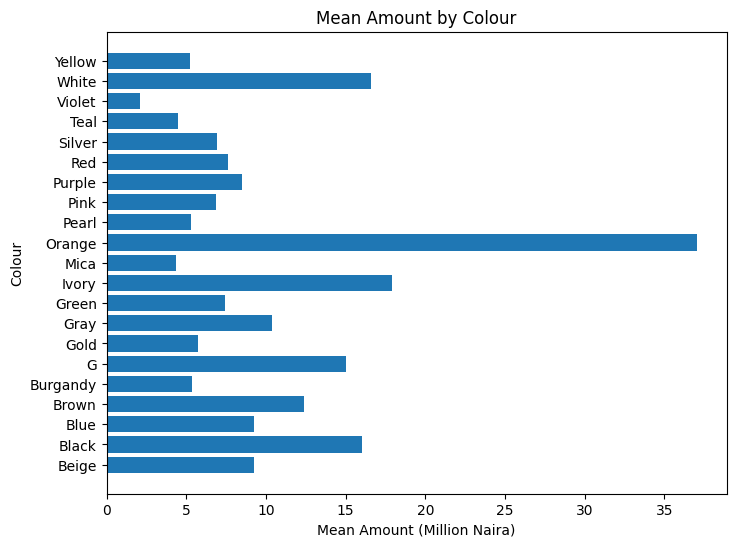

In [25]:
# Calculate the mean amount for each colour
mean_amount_by_colour = data.groupby('Colour')['Amount (Million Naira)'].mean()

# Create a horizontal bar chart with Colour on the y-axis
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.barh(mean_amount_by_colour.index, mean_amount_by_colour)
plt.xlabel('Mean Amount (Million Naira)')
plt.ylabel('Colour')
plt.title('Mean Amount by Colour')
plt.show()

Observation: Orange, White, Ivory and Black appears to be the most expensive

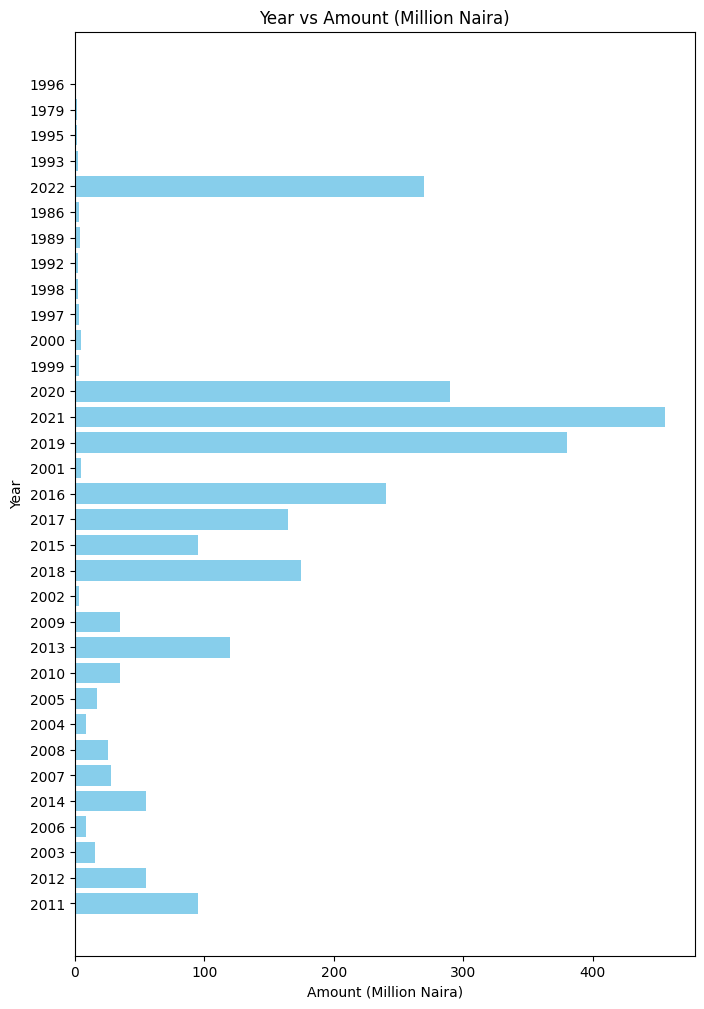

In [26]:
# Create a horizontal bar plot with Year on the y-axis
plt.figure(figsize=(8, 12))
plt.barh(data['Year'], data['Amount (Million Naira)'], color='skyblue')
plt.ylabel('Year')
plt.xlabel('Amount (Million Naira)')
plt.title('Year vs Amount (Million Naira)')
plt.show()

Observation: makes sense that cars were more expensive between 2019-2022

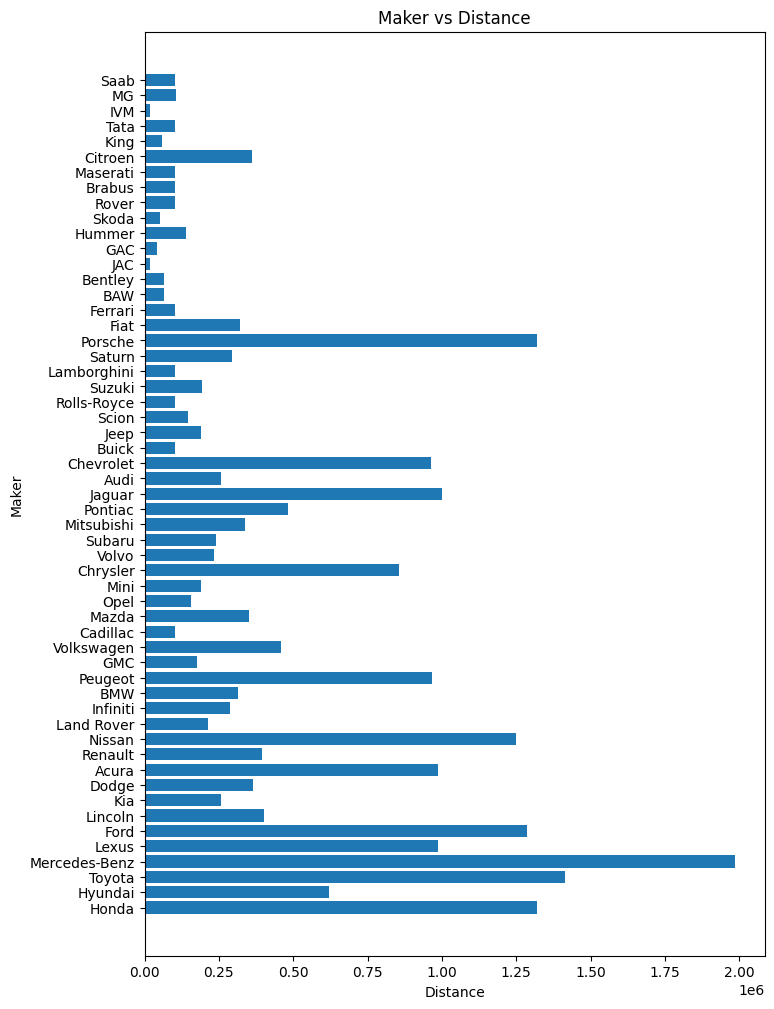

In [27]:
# Create a horizontal bar plot with Maker vs Distance on the y-axis
plt.figure(figsize=(8, 12))
plt.barh(data['Maker'], data['Distance'])
plt.xlabel('Distance')
plt.ylabel('Maker')
plt.title('Maker vs Distance')
plt.show()

Observation: Mercedes-Benz, Toyota, Porshe ans Honda Travelling the Farthest distance

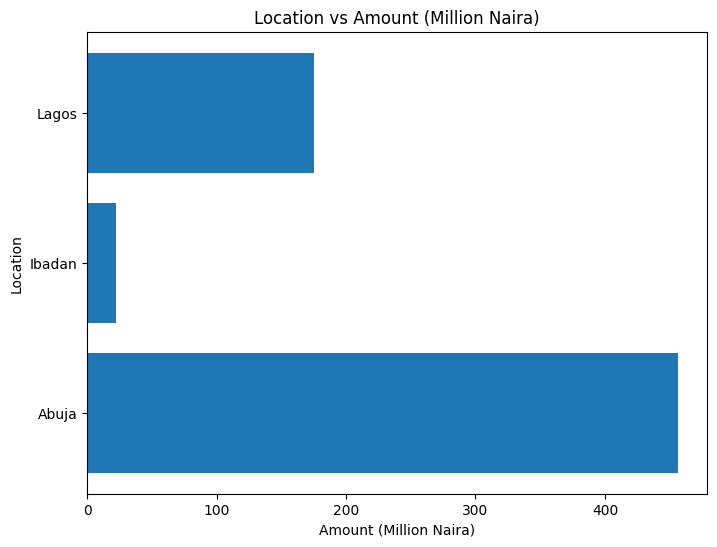

In [28]:
# Create a horizontal bar plot with Location on the y-axis
plt.figure(figsize=(8, 6))
plt.barh(data['Location'], data['Amount (Million Naira)'])
plt.ylabel('Location')
plt.xlabel('Amount (Million Naira)')
plt.title('Location vs Amount (Million Naira)')
plt.show()

Observation: Cars are much more expensive in Abuja and Lagos than Ibadan

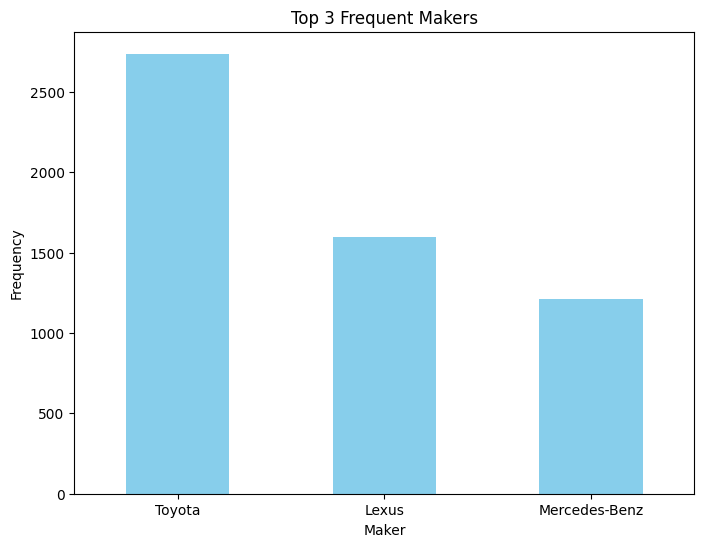

In [29]:
# Count the frequency of each Maker
maker_counts = data['Maker'].value_counts()

# Select the top 3 most frequent Makers
top_3_makers = maker_counts.head(3)

# Create a bar plot to visualize the top 3 frequent Makers
plt.figure(figsize=(8, 6))
top_3_makers.plot(kind='bar', color='skyblue')
plt.xlabel('Maker')
plt.ylabel('Frequency')
plt.title('Top 3 Frequent Makers')
plt.xticks(rotation=0)  # Remove x-axis label rotation if needed
plt.show()

Observation: The top 3 car type in the dataset are Toyota, Lexus and Benz



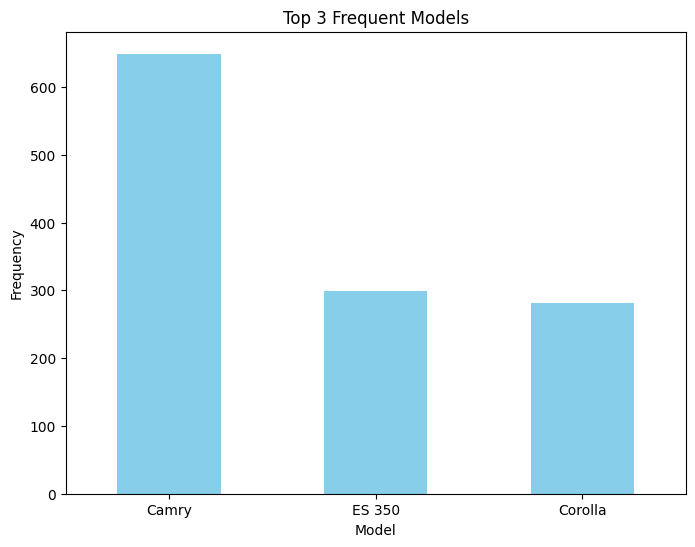

In [30]:
# Count the frequency of each Model
model_counts = data['Model'].value_counts()

# Select the top 3 most frequent Models
top_3_models = model_counts.head(3)

# Create a bar plot to visualize the top 3 frequent Models
plt.figure(figsize=(8, 6))
top_3_models.plot(kind='bar', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Top 3 Frequent Models')
plt.xticks(rotation=0)  # Remove x-axis label rotation if needed
plt.show()

Observation: The top 3 car models in the dataset are Camry, Es350 and corolla


Feature Preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Initialize a single LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform each categorical column
data['Maker'] = label_encoder.fit_transform(data['Maker'])
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Colour'] = label_encoder.fit_transform(data['Colour'])

In [33]:
# Perform one-hot encoding for 'Location' and 'Type' columns
data = pd.get_dummies(data, columns=['Location', 'Type'])

In [34]:
#check the changes of preprocessing on the data
data.head()

,VehicleID,Maker,Model,Year,Colour,Amount (Million Naira),Distance,Location_Abuja,Location_Ibadan,Location_Lagos,Type_Brand New,Type_Foreign Used,Type_Nigerian Used
0,VHL12546,17,116,2011,16,2.20,103199.0,1,0,0,0,0,1
1,VHL18827,19,1047,2012,16,3.50,125000.0,0,1,0,0,0,1
2,VHL15950,52,171,2003,16,3.26,111289.0,0,0,1,0,1,0
3,VHL14526,34,730,2006,16,4.60,103199.0,0,0,1,0,1,0
4,VHL17018,34,399,2014,16,11.85,40000.0,1,0,0,0,1,0


In [35]:
#convert Year datatype from string to Integer
data["Year"] = data["Year"].astype(int)

In [36]:
#drop the VehicleID fom the data
data.drop(["VehicleID"],axis=1, inplace = True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Maker                   7188 non-null   int64  
 1   Model                   7188 non-null   int64  
 2   Year                    7188 non-null   int64  
 3   Colour                  7188 non-null   int64  
 4   Amount (Million Naira)  7188 non-null   float64
 5   Distance                7188 non-null   float64
 6   Location_Abuja          7188 non-null   uint8  
 7   Location_Ibadan         7188 non-null   uint8  
 8   Location_Lagos          7188 non-null   uint8  
 9   Type_Brand New          7188 non-null   uint8  
 10  Type_Foreign Used       7188 non-null   uint8  
 11  Type_Nigerian Used      7188 non-null   uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 435.2 KB


### Modelling

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Separate the features and the target variable
X = data.drop('Amount (Million Naira)', axis=1)  # Features
y = data['Amount (Million Naira)']  # Target variable

In [40]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [41]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
# Initialize lists to store RMSE values for each model
rmse_list = []

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
rmse_linear = sqrt(mean_squared_error(y, y_pred_linear))
rmse_list.append(("Linear Regression", rmse_linear))

# CatBoost Regressor with 5-fold cross-validation
catboost_rmse_list = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    catboost_model = CatBoostRegressor()
    catboost_model.fit(X_train, y_train)
    y_pred_catboost = catboost_model.predict(X_test)
    rmse_catboost = sqrt(mean_squared_error(y_test, y_pred_catboost))
    catboost_rmse_list.append(rmse_catboost)

# Average RMSE for CatBoost Regressor
avg_rmse_catboost = np.mean(catboost_rmse_list)
rmse_list.append(("CatBoost Regressor", avg_rmse_catboost))

# XGBoost Regressor with 5-fold cross-validation
xgboost_rmse_list = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgboost_model = XGBRegressor()
    xgboost_model.fit(X_train, y_train)
    y_pred_xgboost = xgboost_model.predict(X_test)
    rmse_xgboost = sqrt(mean_squared_error(y_test, y_pred_xgboost))
    xgboost_rmse_list.append(rmse_xgboost)

# Average RMSE for XGBoost Regressor
avg_rmse_xgboost = np.mean(xgboost_rmse_list)
rmse_list.append(("XGBoost Regressor", avg_rmse_xgboost))

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)
y_pred_decision_tree = decision_tree_model.predict(X)
rmse_decision_tree = sqrt(mean_squared_error(y, y_pred_decision_tree))
rmse_list.append(("Decision Tree Regressor", rmse_decision_tree))

# Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X, y)
y_pred_random_forest = random_forest_model.predict(X)
rmse_random_forest = sqrt(mean_squared_error(y, y_pred_random_forest))
rmse_list.append(("Random Forest Regressor", rmse_random_forest))

# Gradient Boosting Regressor
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X, y)
y_pred_gradient_boost = gradient_boost_model.predict(X)
rmse_gradient_boost = sqrt(mean_squared_error(y, y_pred_gradient_boost))
rmse_list.append(("Gradient Boosting Regressor", rmse_gradient_boost))

Streaming output truncated to the last 5000 lines.
4:	learn: 22.0098996	total: 57.9ms	remaining: 11.5s
5:	learn: 21.4676970	total: 60.9ms	remaining: 10.1s
6:	learn: 21.0017300	total: 64.4ms	remaining: 9.13s
7:	learn: 20.5685481	total: 68.7ms	remaining: 8.52s
8:	learn: 20.1202482	total: 73.9ms	remaining: 8.14s
9:	learn: 19.6999563	total: 76.5ms	remaining: 7.57s
10:	learn: 19.3310453	total: 78.4ms	remaining: 7.05s
11:	learn: 18.9867636	total: 80.3ms	remaining: 6.61s
12:	learn: 18.6775363	total: 82.1ms	remaining: 6.24s
13:	learn: 18.3355668	total: 84.2ms	remaining: 5.93s
14:	learn: 18.0113318	total: 86ms	remaining: 5.65s
15:	learn: 17.6995832	total: 88ms	remaining: 5.41s
16:	learn: 17.4028866	total: 89.8ms	remaining: 5.2s
17:	learn: 17.1650550	total: 91.5ms	remaining: 4.99s
18:	learn: 16.9242331	total: 93.5ms	remaining: 4.83s
19:	learn: 16.7142884	total: 95.4ms	remaining: 4.68s
20:	learn: 16.4925750	total: 97.6ms	remaining: 4.55s
21:	learn: 16.2674722	total: 99.9ms	remaining: 4.44s
22:	le

In [43]:
#create a dataframe to inset rmse for each model
rmse_df = pd.DataFrame(rmse_list, columns=["ModelName", "RMSE"])


In [44]:
#display the dataframe
rmse_df

,ModelName,RMSE
0,Linear Regression,20.119837
1,CatBoost Regressor,11.819174
2,XGBoost Regressor,12.372895
3,Decision Tree Regressor,0.953884
4,Random Forest Regressor,4.905858
5,Gradient Boosting Regressor,9.427643


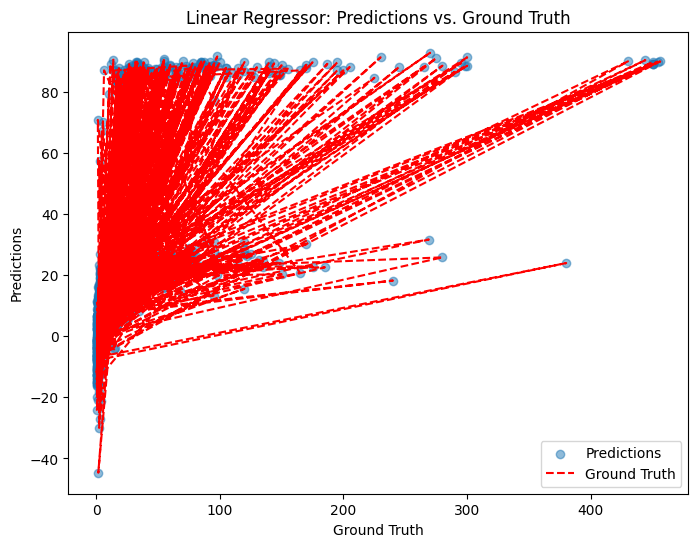

In [47]:
# Create scatter plots for each model

# Linear Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_linear, alpha=0.5, label='Predictions')
plt.plot(y, y_pred_linear, color='red', linestyle='--', label='Ground Truth')
plt.title("Linear Regressor: Predictions vs. Ground Truth")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.legend()
plt.show()

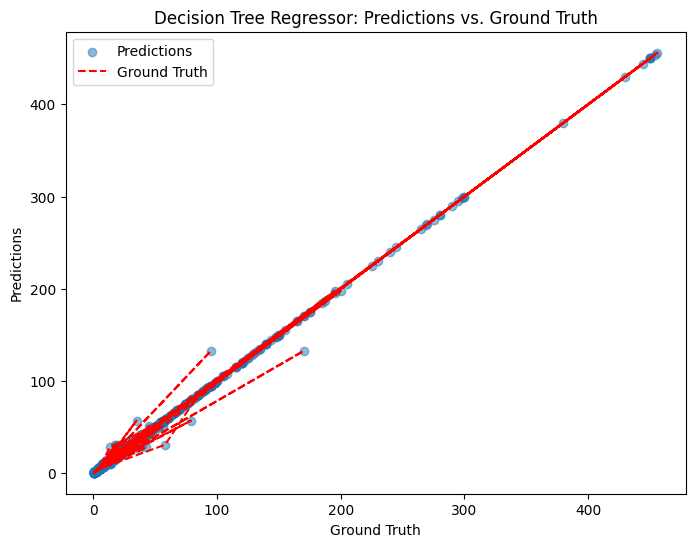

In [49]:
# Decision Tree Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_decision_tree, alpha=0.5, label='Predictions')
plt.plot(y, y_pred_decision_tree, color='red', linestyle='--', label='Ground Truth')
plt.title("Decision Tree Regressor: Predictions vs. Ground Truth")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.legend()
plt.show()